In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import pandas as pd

mu0 = (4 * np.pi * 10**-7)




In [18]:
df2 = pd.read_excel('LAMS/no20-1200h_peak_magnetic_polarisation.xlsx')
df2.head()

,Hpeak (A/m),50 Hz,100 Hz,200 Hz,400 Hz,700 Hz,1000 Hz,2500 Hz,5000 Hz,10000 Hz
0,20,0.076,0.073,0.073,0.073,0.069,0.066,0.058,0.041,0.032
1,30,0.190,0.180,0.180,0.170,0.130,0.100,0.078,0.053,0.040
2,50,0.590,0.580,0.520,0.420,0.300,0.240,0.150,0.093,0.063
3,70,0.840,0.830,0.800,0.740,0.600,0.470,0.250,0.160,0.100
4,100,1.040,1.040,1.020,1.000,0.950,0.840,0.450,0.270,0.170


In [19]:
lamdata1 = pd.read_excel('LAMS/LAMS/BMT4679_LAM#1_Alvier_21407_BST-SA DCK_Hmax=3800Am H.xlsx', sheet_name='DataPoints')
lamdata2 = pd.read_excel('LAMS/LAMS/BMT4680_LAM#2_Alvier_21407_BST-SA DCK_Hmax=3800Am H.xlsx', sheet_name='DataPoints')
lamdata3 = pd.read_excel('LAMS/LAMS/BMT4681_LAM#3_Alvier_21407_BST-SA DCK_Hmax=3800Am H.xlsx', sheet_name='DataPoints')

lamdata1.head()

,Measurement,No.,Field strength [A/m],Polarisation [T],Current [A],Voltage [V],Uf [V],Frequency Spectrum,Power Spectrum U2,Phase Spectrum U2,Power Spectrum B,Phase Spectrum B,Power Spectrum H,Phase Spectrum H,Generator,Regulator Output,Primary Voltage
0,3800.0A/m/0Hz,1,0.000000,0.000000,0.000000,0.000000,0.009346,0,0.009778,2.763747e-14,1.584845,2.434459e-14,1045.814506,3.104713e-14,4.122158,0,0
1,3800.0A/m/0Hz,2,23.402643,0.037801,0.244849,0.000233,0.011683,0,0.003321,9.212595e+01,0.538197,9.212595e+01,626.281896,4.121770e+01,4.122124,0,0
2,3800.0A/m/0Hz,3,31.933909,0.063031,0.334106,0.000389,0.006192,0,0.001635,9.609121e+01,0.264950,9.609121e+01,490.937426,5.571001e+01,3.441919,0,0
3,3800.0A/m/0Hz,4,39.300760,0.090435,0.411182,0.000558,0.010281,0,0.001088,9.975513e+01,0.176288,9.975513e+01,399.035852,6.951675e+01,2.819087,0,0
4,3800.0A/m/0Hz,5,45.148504,0.115389,0.472363,0.000712,0.008412,0,0.000816,1.036421e+02,0.132279,1.036421e+02,327.463333,8.125096e+01,2.284751,0,0


In [20]:
lamdata1['Relative permeability'] = lamdata1['Polarisation [T]'] / lamdata1['Field strength [A/m]'] / mu0
lamdata2['Relative permeability'] = lamdata2['Polarisation [T]'] / lamdata2['Field strength [A/m]'] / mu0
lamdata3['Relative permeability'] = lamdata3['Polarisation [T]'] / lamdata3['Field strength [A/m]'] / mu0

In [21]:
df2['Relative permeability'] = df2['50 Hz'] / df2['Hpeak (A/m)'] / mu0

xdata = np.array(df2['50 Hz'].values, dtype='float64')
ydata = np.array(df2['Relative permeability'].values, dtype='float64')

#do this interpolation for lamdata 1
x_interp_target = lamdata1['Polarisation [T]']

y_interp = np.interp(x_interp_target, xdata, ydata)
lamdata1['interpolated datasheet permeability'] = y_interp

lamdata1['permbuildfactor'] = lamdata1['Relative permeability'] / lamdata1['interpolated datasheet permeability']

#do this interpolation for lamdata 2
x_interp_target = lamdata2['Polarisation [T]']

y_interp = np.interp(x_interp_target, xdata, ydata)
lamdata2['interpolated datasheet permeability'] = y_interp

lamdata2['permbuildfactor'] = lamdata2['Relative permeability'] / lamdata2['interpolated datasheet permeability']

#do this interpolation for lamdata 3
x_interp_target = lamdata3['Polarisation [T]']

y_interp = np.interp(x_interp_target, xdata, ydata)
lamdata3['interpolated datasheet permeability'] = y_interp

lamdata3['permbuildfactor'] = lamdata3['Relative permeability'] / lamdata3['interpolated datasheet permeability']

In [24]:
# 1) Stack the three samples with a source key (MultiIndex: level 0 = sample, level 1 = original index)
combined = pd.concat([lamdata1, lamdata2, lamdata3], keys=['s1', 's2', 's3'])

# 2) Coerce all columns to numeric (handles things like "1,234" or mixed types)
def _coerce_numeric(df):
    # try replacing comma decimals, then to_numeric
    for c in df.columns:
        if df[c].dtype == 'object':
            df[c] = (
                df[c]
                .astype(str)
                .str.replace(',', '.', regex=False)
            )
        df[c] = pd.to_numeric(df[c], errors='coerce')
    return df

combined = _coerce_numeric(combined.copy())

# 3) Group by the original row index (level=1) and take the mean of numeric columns only
lamdata_avg = combined.groupby(level=1).mean(numeric_only=True)


C:\Users\sepofy\AppData\Local\Temp\ipykernel_16788\1443588573.py:96: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


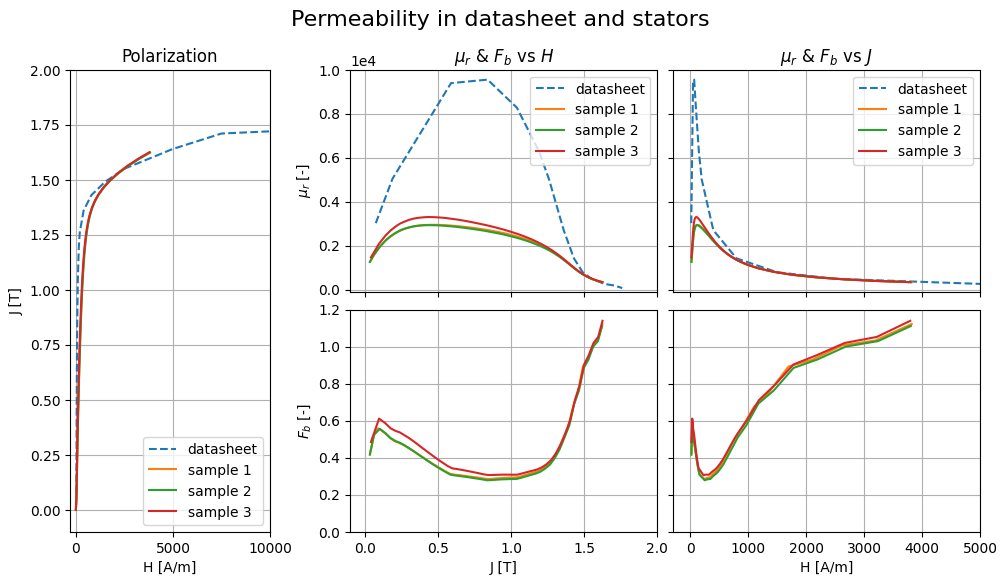

In [ ]:
### Plot polarization and permebility data for NO20-1200
#fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(14, 6)) # Fixed grid subplot
#ax = ax.flatten() # Make a 1D array out of the 2D array

# Plot axes limits
Blim = [-0.1, 2]
Hlim = [-300, 5000]
mulim = [-100, 10000]
mubflim = [0, 1.2]

fig = plt.figure(figsize=(10, 6)) # Create figure with specified size and tight layout
# Create gridspec for larger figure
gs1 = GridSpec(2,1, left=0.07, right=0.27, hspace=0.10, wspace=0.10, figure=fig)
gs2 = GridSpec(2,2, left=0.35, right=0.98, hspace=0.08, wspace=0.05, figure=fig)

# Allocate all axes manually
ax = [None]*5  # None-list of length 5 for all axes
ax[0] = fig.add_subplot(gs1[:,:])                               # Col 0, Row 0-1
ax[1] = fig.add_subplot(gs2[0])                                 # Col 1, Row 0
ax[2] = fig.add_subplot(gs2[1], sharey=ax[1])                   # Col 2, Row 0
ax[3] = fig.add_subplot(gs2[2], sharex=ax[1])                   # Col 1, Row 1
ax[4] = fig.add_subplot(gs2[3], sharex=ax[2], sharey=ax[3])     # Col 2, Row 1

# Set axes labels only on outer plots
for x in ax:
    x.label_outer()


fig.suptitle('Permeability in datasheet and stators', fontsize=16)


# First column plot: Polarization, measured vs datasheet
ax[0].plot(              df2['Hpeak (A/m)'], df2['50 Hz'], '--', label='datasheet', c='tab:blue')
ax[0].plot(lamdata1['Field strength [A/m]'], lamdata1['Polarisation [T]'], label='sample 1', c='tab:orange')
ax[0].plot(lamdata2['Field strength [A/m]'], lamdata2['Polarisation [T]'], label='sample 2', c='tab:green')
ax[0].plot(lamdata3['Field strength [A/m]'], lamdata3['Polarisation [T]'], label='sample 3', c='tab:red')

ax[0].set_xlim( [ Hlim[0], Hlim[1]*2] )
ax[0].set_xlabel('H [A/m]')
ax[0].set_ylim(Blim)
ax[0].set_ylabel('J [T]')
ax[0].set_title('Polarization')
ax[0].legend(loc='lower right')
ax[0].grid(True)


# Second column plot: relative permeability vs flux density, measured vs datasheet
ax[1].plot(                df2['50 Hz'], df2['Relative permeability'], '--', label='datasheet', c='tab:blue')
ax[1].plot(lamdata1['Polarisation [T]'], lamdata1['Relative permeability'], label='sample 1', c='tab:orange')
ax[1].plot(lamdata2['Polarisation [T]'], lamdata2['Relative permeability'], label='sample 2', c='tab:green')
ax[1].plot(lamdata3['Polarisation [T]'], lamdata3['Relative permeability'], label='sample 3', c='tab:red')

#ax[1].set_xlabel('J [T]')
ax[1].set_xlim(Blim)
ax[1].set_ylabel(r'$\mu_r$ [-]')
ax[1].ticklabel_format(axis='y', style='sci', scilimits=(4,4))
ax[1].set_ylim(mulim)
ax[1].set_title(r'$\mu_r$ & $F_b$ vs $H$')
ax[1].legend(loc='upper right')
ax[1].grid(True)

# Third column plot: relative permeability vs field intensity, measured vs datasheet
ax[2].plot(     df2['Hpeak (A/m)'],           df2['Relative permeability'], '--', label='datasheet', c='tab:blue')
ax[2].plot(lamdata1['Field strength [A/m]'], lamdata1['Relative permeability'], label='sample 1', c='tab:orange')
ax[2].plot(lamdata2['Field strength [A/m]'], lamdata2['Relative permeability'], label='sample 2', c='tab:green')
ax[2].plot(lamdata3['Field strength [A/m]'], lamdata3['Relative permeability'], label='sample 3', c='tab:red')
#ax[2].set_xlabel('H [A/m]')
ax[2].set_xlim(Hlim)
#ax[2].set_ylabel(r'$\mu_r$ [-]')
ax[2].set_ylim(mulim)
ax[2].legend(loc='upper right')
ax[2].set_title(r'$\mu_r$ & $F_b$ vs $J$')
ax[2].grid(True)


# Fourth column plot: relative permeability build factor
ax[3].plot(lamdata1['Polarisation [T]'], lamdata1['permbuildfactor'], label='sample 1', c='tab:orange')
ax[3].plot(lamdata2['Polarisation [T]'], lamdata2['permbuildfactor'], label='sample 2', c='tab:green')
ax[3].plot(lamdata3['Polarisation [T]'], lamdata3['permbuildfactor'], label='sample 3', c='tab:red')
ax[3].set_xlabel('J [T]')
ax[3].set_xlim(Blim)
ax[3].set_ylabel(r'$F_b$ [-]')
ax[3].set_ylim(mubflim)
ax[3].grid(True)


# Fifth column plot: relative permeability build factor
ax[4].plot(lamdata1['Field strength [A/m]'], lamdata1['permbuildfactor'], label='sample 1', c='tab:orange')
ax[4].plot(lamdata2['Field strength [A/m]'], lamdata2['permbuildfactor'], label='sample 2', c='tab:green')
ax[4].plot(lamdata3['Field strength [A/m]'], lamdata3['permbuildfactor'], label='sample 3', c='tab:red')
ax[4].set_xlabel('H [A/m]')
ax[4].set_xlim(Hlim)
#ax[4].set_ylabel(r'$\mu_{r-test} / \mu_{r-data}$ [-]')
ax[4].set_ylim(mubflim)
ax[4].grid(True)
plt.tight_layout()
plt.savefig('figures/svg/bh_no20-1200h.svg')
plt.savefig('figures/png/bh_no20-1200h.png', dpi=600)
plt.savefig('figures/eps/bh_no20-1200h.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


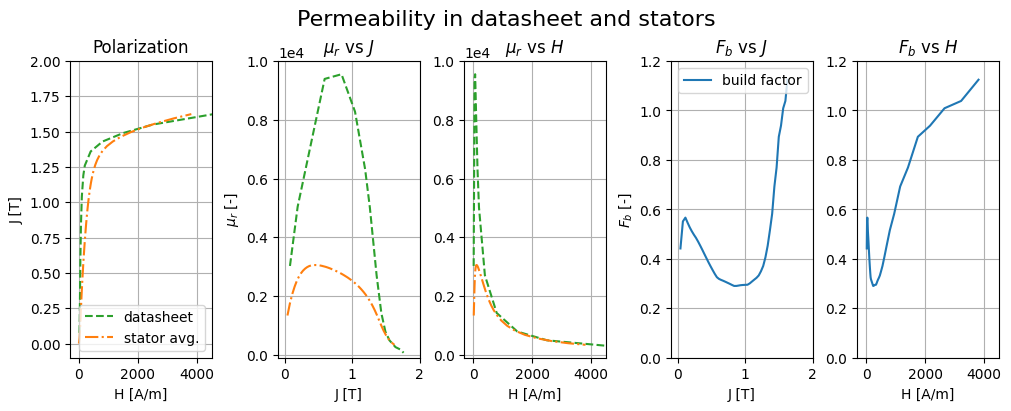

In [35]:
# --- layout: 1 row, 5 columns ---
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(10, 4), constrained_layout=True)
ax = ax.flatten()

fig.suptitle('Permeability in datasheet and stators', fontsize=16)

# Plot axes limits
Blim   = [-0.1, 2]
Hlim   = [-300, 4500]
mulim  = [-100, 10000]
mubflim = [0, 1.2]

# ------------------ 1) Polarization (J vs H) ------------------
ax[0].plot(              df2['Hpeak (A/m)'], df2['50 Hz'], '--', label='datasheet', c='tab:green')
ax[0].plot(lamdata_avg['Field strength [A/m]'], lamdata_avg['Polarisation [T]'], label='stator avg.', c='tab:orange', ls='dashdot')
ax[0].set_xlim([Hlim[0], Hlim[1]])
ax[0].set_ylim(Blim)
ax[0].set_xlabel('H [A/m]')
ax[0].set_ylabel('J [T]')
ax[0].set_title('Polarization')
ax[0].legend(loc='lower right')
ax[0].grid(True)

# ------------------ 2) μ_r vs J ------------------
ax[1].plot(                df2['50 Hz'], df2['Relative permeability'], '--', label='datasheet', c='tab:green')
ax[1].plot(lamdata_avg['Polarisation [T]'], lamdata_avg['Relative permeability'], label='stator avg.', c='tab:orange', ls='dashdot')
ax[1].set_xlim(Blim)
ax[1].set_ylim(mulim)
ax[1].set_xlabel('J [T]')
ax[1].set_ylabel(r'$\mu_r$ [-]')
ax[1].ticklabel_format(axis='y', style='sci', scilimits=(4,4))
ax[1].set_title(r'$\mu_r$ vs $J$')
#ax[1].legend(loc='upper right')
ax[1].grid(True)

# ------------------ 3) μ_r vs H ------------------
ax[2].plot(     df2['Hpeak (A/m)'],           df2['Relative permeability'], '--', label='datasheet', c='tab:green')
ax[2].plot(lamdata_avg['Field strength [A/m]'], lamdata_avg['Relative permeability'], label='stator avg.', c='tab:orange', ls='dashdot')
ax[2].set_xlim(Hlim)
ax[2].set_ylim(mulim)
ax[2].set_xlabel('H [A/m]')
# y-label omitted to reduce clutter (μ_r already labeled on ax[1])
ax[2].ticklabel_format(axis='y', style='sci', scilimits=(4,4))
ax[2].set_title(r'$\mu_r$ vs $H$')
#ax[2].legend(loc='upper right')
ax[2].grid(True)

# ------------------ 4) Build factor F_b vs J ------------------
ax[3].plot(lamdata_avg['Polarisation [T]'], lamdata_avg['permbuildfactor'], label='build factor', c='tab:blue')
ax[3].set_xlim(Blim)
ax[3].set_ylim(mubflim)
ax[3].set_xlabel('J [T]')
ax[3].set_ylabel(r'$F_b$ [-]')
ax[3].set_title(r'$F_b$ vs $J$')
ax[3].legend(loc='upper left')
ax[3].grid(True)

# ------------------ 5) Build factor F_b vs H ------------------
ax[4].plot(lamdata_avg['Field strength [A/m]'], lamdata_avg['permbuildfactor'], label='build factor', c='tab:blue')
ax[4].set_xlim(Hlim)
ax[4].set_ylim(mubflim)
ax[4].set_xlabel('H [A/m]')
# y-label omitted (already on ax[3])
ax[4].set_title(r'$F_b$ vs $H$')
ax[4].grid(True)

# Optional: trim y tick labels on the middle panels to reduce clutter
# for i in [2,4]: ax[i].yaxis.set_tick_params(labelleft=False)

# Save
plt.savefig('figures/svg/bh_no20-1200h_1row.svg')
plt.savefig('figures/png/bh_no20-1200h_1row.png', dpi=600)
plt.savefig('figures/eps/bh_no20-1200h_1row.eps')
plt.show()
